# Pyroxene Classification Diagrams
- The function uses fields for the pyroxene ternary from Deer, Howie, and Zussman (1963).
- This function relies heavily on the ternary plot package from Marc Harper et al. 2015 - https://github.com/marcharper/python-ternary, if you use these figures, you must cite that (Marc Harper et al. (2015). python-ternary: Ternary Plots in Python. Zenodo. 10.5281/zenodo.594435) as well as Thermobar. 
- You may have problems with this package if you have the separate "ternary" package installed (yes, there are python packages called ternary and python-ternary- Yay!). I (penny) got the error "module ternary has no attribute figure", so had to uninstall the ternary I had through pip (pip uninstall ternary), and re-install python-ternary through conda in the command line "conda install python-ternary". If you have everything in pip, or conda, keep in 1 environment, don't follow my bad example here!
- You can get the excel spreadsheet here: https://github.com/PennyWieser/Thermobar/blob/main/docs/Examples/Opx_and_Opx_Liq_Thermobarometry/Opx_Liq_Example.xlsx


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import Thermobar as pt

##  Load in some Opx compositions

In [2]:
out=pt.import_excel('Opx_Liq_Example.xlsx', sheet_name="Paired_Opx_Liq")
my_input=out['my_input']
Liqs=out['Liqs']
Opxs=out['Opxs']

## Calculate Opx components
- We are plotting in Mg-Fe-Ca space, so En is simply Mg/(Mg+Fet+Ca) etc.
- These are returned from the calculate_orthopyroxene_components function with the names "En_Simple_MgFeCa_Opx" etc.

In [4]:
opx_comps=pt.calculate_orthopyroxene_components(opx_comps=Opxs)

## Example 1 (hold on, we'll add data in a second)
- Lets draw the diagram first to show you options

### Example 1a - Simplicest, grid, no labels, trimming off the top to make a quadrilateral

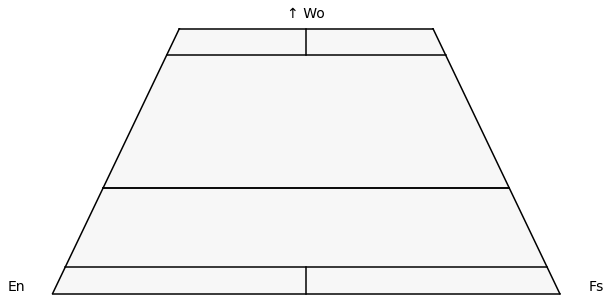

In [5]:
fig, tax = pt.plot_px_classification(figsize=(10, 5))

### Example 1b - Lets keep the top!

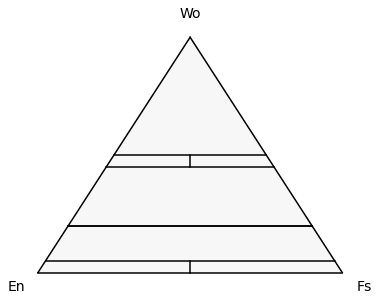

In [6]:
fig, tax = pt.plot_px_classification(figsize=(6,5), cut_in_half=False)

### Example 1c- Lets add the field names on
- You can change font size using fontsize_component_labels to match the fig size

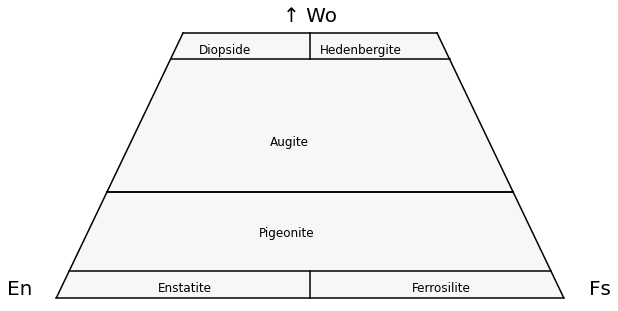

In [7]:
fig, tax = pt.plot_px_classification(figsize=(10, 5), labels=True, 
                                     fontsize_component_labels=12,
                                    fontsize_axes_labels=20)

## Example 1d - Lets add a grid

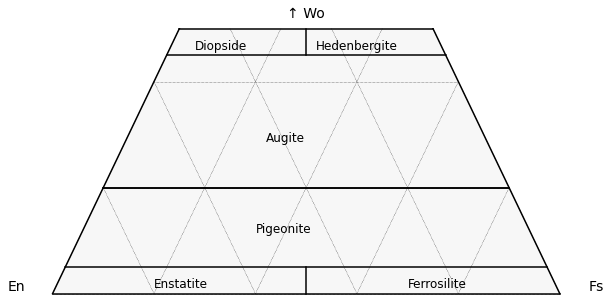

In [8]:
fig, tax = pt.plot_px_classification(figsize=(10, 5), labels=True, fontsize_component_labels=12,
                                     major_grid=True)

### Example 1e - Lets add a minor grid

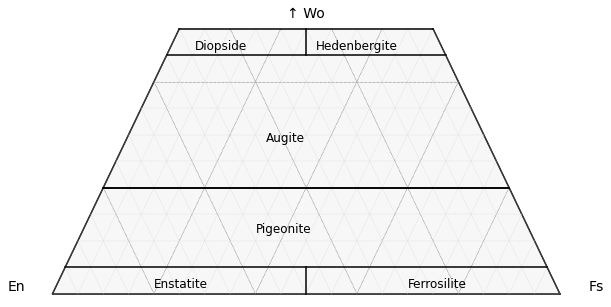

In [9]:
fig, tax = pt.plot_px_classification(figsize=(10, 5), labels=True, fontsize_component_labels=12, 
                                     major_grid=True, minor_grid=True)

## Example 2 - Lets add your data (simple to start!)

<AxesSubplot:>

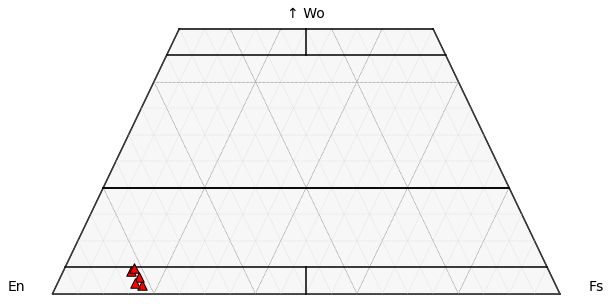

In [10]:
fig, tax = pt.plot_px_classification(figsize=(10, 5),  fontsize_component_labels=12, 
                                     major_grid=True, minor_grid=True)

## Calculate your data in terms of ternary axes
px_points = pt.tern_points(
    opx_comps["Fs_Simple_MgFeCa_Opx"],  opx_comps["Wo_Simple_MgFeCa_Opx"],  opx_comps["En_Simple_MgFeCa_Opx"])

tax.scatter(
    px_points,
    edgecolor="k",
    marker="^",
    facecolor="red",
    label='Label1',
   s=90
)
    

## Example 3 - Lets color by Px Cr content

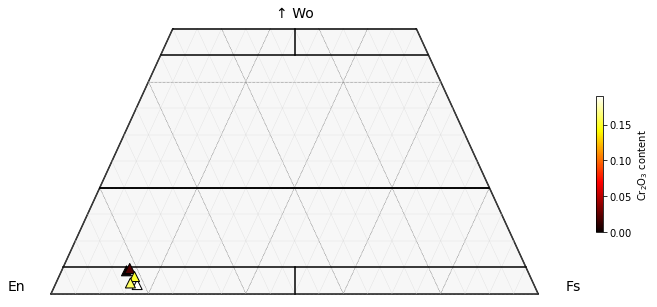

In [11]:
fig, tax = pt.plot_px_classification(figsize=(12, 5),  fontsize_component_labels=12, 
                                     major_grid=True, minor_grid=True)

## Calculate your data in terms of ternary axes
px_points = pt.tern_points(
    opx_comps["Fs_Simple_MgFeCa_Opx"],  opx_comps["Wo_Simple_MgFeCa_Opx"],  opx_comps["En_Simple_MgFeCa_Opx"])

tax.scatter(
    px_points,
    c=opx_comps["Cr2O3_Opx"],
    vmin=np.min(opx_comps["Cr2O3_Opx"]),
    vmax=np.max(opx_comps["Cr2O3_Opx"]),
    s=100,
    edgecolor="k",
    marker="^",
    cmap="hot",
    colormap="hot",
    colorbar=True,
    cb_kwargs={"shrink": 0.5, "label": "Cr$_2$O$_3$ content"},
    
)
fig.savefig('Pyroxene_Class.png', dpi=200)